In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [10]:
#Charger les données
training_data = pd.read_csv("Training.csv")
testing_data = pd.read_csv("Testing.csv")

dim_Train = training_data.shape
dim_Test = testing_data.shape

print("La dimension du training_data est :", dim_Train)
print("La dimension du testing_data est :", dim_Test)

La dimension du training_data est : (4920, 134)
La dimension du testing_data est : (42, 133)


In [11]:
derniere_colonne = training_data.iloc[:, 133]
print("Dernière colonne par indice est :\n", derniere_colonne)

#Noms des colonnes de notre dataset
print(training_data.columns)

valeurs_uniques = training_data['Unnamed: 133'].unique()
print(valeurs_uniques) #la colonne "Unnamed: 133" contient que des Na

#Suppression de la colonne "Unnamed: 133", car elle contient que des Na
training_data = training_data.drop(columns=['Unnamed: 133'])

Dernière colonne par indice est :
 0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
4915   NaN
4916   NaN
4917   NaN
4918   NaN
4919   NaN
Name: Unnamed: 133, Length: 4920, dtype: float64
Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)
[nan]


In [12]:
print(training_data.head())

#liste des différentes classes (maladies)
valeurs_uniques = training_data['prognosis'].unique()
print(valeurs_uniques.shape) #42 maladies
#Occurrences de chaque classe
nb_valeurs_uniques = training_data['prognosis'].value_counts()
print(nb_valeurs_uniques)

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             

In [16]:
X_train = training_data.iloc[:,0:132]
Y_train = training_data.iloc[:, 132] 
x = train_data.shape[0]
y = train_data.shape[1]
print(x, y)
print(Y.shape)

4920 132
(4920,)


In [17]:
# Définition du modèle TensorFlow
def create_model(input_size, nb_classes):
    model = tf.keras.models.Sequential()

    # Couche dense avec 128 neurones et une fonction d'activation 'sigmoid'
    model.add(tf.keras.layers.Dense(128, input_shape=(input_size,), activation='sigmoid'))

    # Couche de sortie avec softmax pour la classification des 42 classes
    model.add(tf.keras.layers.Dense(nb_classes, activation='softmax'))

    # Compilation du modèle
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [18]:
# Encodage des étiquettes en entiers
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)

# Transformation en one-hot encoding
Y_train_one_hot = tf.keras.utils.to_categorical(Y_train_encoded, num_classes=42)

# Séparer les features et les labels de test
X_test = testing_data.iloc[:, 0:132].values
Y_test_encoded = label_encoder.transform(testing_data['prognosis'])
Y_test_one_hot = tf.keras.utils.to_categorical(Y_test_encoded, num_classes=42)


In [19]:
# Création du modèle
input_size = X_train.shape[1]  # Nombre de features
nb_classes = 42  # Nombre de classes (maladies)

model = create_model(input_size, nb_classes)

# Entraînement du modèle
history = model.fit(X_train, Y_train_one_hot, epochs=100, batch_size=32, validation_data=(X_test, Y_test_one_hot))


c:\Users\lisas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2981 - loss: 3.4827 - val_accuracy: 0.9286 - val_loss: 2.4118
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9566 - loss: 2.1102 - val_accuracy: 0.9762 - val_loss: 1.1353
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9994 - loss: 0.9692 - val_accuracy: 0.9762 - val_loss: 0.4764
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9999 - loss: 0.4253 - val_accuracy: 0.9762 - val_loss: 0.2463
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.2164 - val_accuracy: 0.9762 - val_loss: 0.1611
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.1307 - val_accuracy: 0.9762 - val_loss: 0.1169
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0868 - val_accuracy: 0.9762 - val_loss: 0.0925
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0593 - val_accu

In [20]:
# Évaluation du modèle sur l'ensemble d'entraînement
train_loss, train_accuracy = model.evaluate(X_train, Y_train_one_hot)
print(f"Précision sur l'ensemble d'entraînement: {train_accuracy:.2%}")

# Évaluation du modèle sur l'ensemble de test
test_loss, test_accuracy = model.evaluate(X_test, Y_test_one_hot)
print(f"Précision sur l'ensemble de test :  {test_accuracy:.2%}")


154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.5969e-06
Précision sur l'ensemble d'entraînement: 100.00%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9841 - loss: 0.0370  
Précision sur l'ensemble de test : 97.62%


In [24]:
# Prédictions sur les données de test
test_predictions = model.predict(X_test)

# Convertir les prédictions en classes (maladies)
test_predictions_classes = np.argmax(test_predictions, axis=1)

# Mapper les indices aux noms des maladies
noms_maladies_predites = label_encoder.inverse_transform(test_predictions_classes)
print(noms_maladies_predites)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo' 'Impetigo']


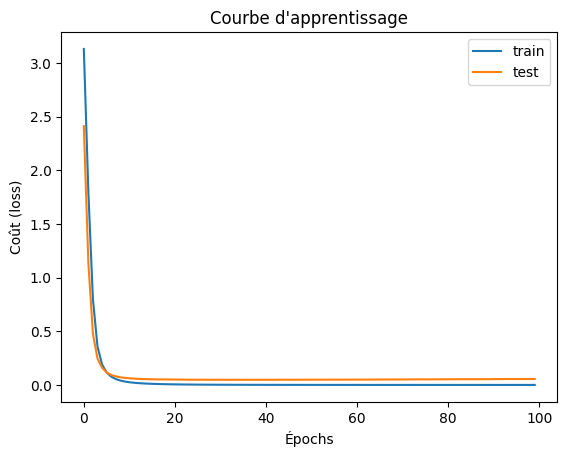

In [25]:
# Tracer la courbe d'apprentissage
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel("Épochs")
plt.ylabel("Coût (loss)")
plt.title("Courbe d'apprentissage")
plt.legend()
plt.show()
